# DSCI 100 INDIVIDUAL PLANNING REPORT

**Name:** ARJUN VARMA

**Project:** Predicting newsletter subscription on Mincecraft research server.

In this notebook I will be describing the data, stating my 

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

glimpse(players)
glimpse(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

In [12]:
n_players <- nrow(players)
p_players <- ncol(players)
n_sessions <- nrow(sessions)
p_sessions <- ncol(sessions)

n_players; p_players
n_sessions; p_sessions

players_variables <- tibble(
    variable = names(players),
    type = sapply(players, function(x) class(x)[1]),
    description = c("Self-rated Minecraft experience (e.g., Beginner, Amateur, Regular, Veteran, Pro).",
    "Whether the player subscribed to the game newsletter (TRUE/FALSE).",
    "Hashed email used as anonymous player ID.",
    "Total time the player has spent on the server (hours).",
    "Self-reported display name.",
    "Self-identified gender category.",
    "Self-reported age in years."
  )
)

players_variables

[1] 196

[1] 7

[1] 1535

[1] 5

variable,type,description
<chr>,<chr>,<chr>
experience,character,"Self-rated Minecraft experience (e.g., Beginner, Amateur, Regular, Veteran, Pro)."
subscribe,logical,Whether the player subscribed to the game newsletter (TRUE/FALSE).
hashedEmail,character,Hashed email used as anonymous player ID.
played_hours,numeric,Total time the player has spent on the server (hours).
name,character,Self-reported display name.
gender,character,Self-identified gender category.
Age,numeric,Self-reported age in years.


In [13]:
players_clean <- players|>
        mutate(
            subscribe = as.factor(subscribe),
            experience = factor(
                experience,
                levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro")
                )
            )

glimpse(players_clean)

players_means <- players_clean |>
            summarise(across(
                where(is.numeric),
                ~ round(mean(.x,na.rm = TRUE), 2)
                )) |>
                pivot_longer(
                    everything(),
                    names_to = "variable",
                    values_to = "mean"
                    )
players_means


Rows: 196
Columns: 7
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ subscribe    <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


variable,mean
<chr>,<dbl>
played_hours,5.85
Age,21.14


In [23]:
players_clean |>
summarise(
    mean_age = round(mean(Age, na.rm = TRUE), 2),
    min_age = min(Age, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE),
        
    mean_played = round(mean(played_hours, na.rm = TRUE), 2),
    min_played = min(played_hours, na.rm = TRUE),
    max_played = max(played_hours, na.rm = TRUE)
)

mean_age,min_age,max_age,mean_played,min_played,max_played
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.14,9,58,5.85,0,223.1


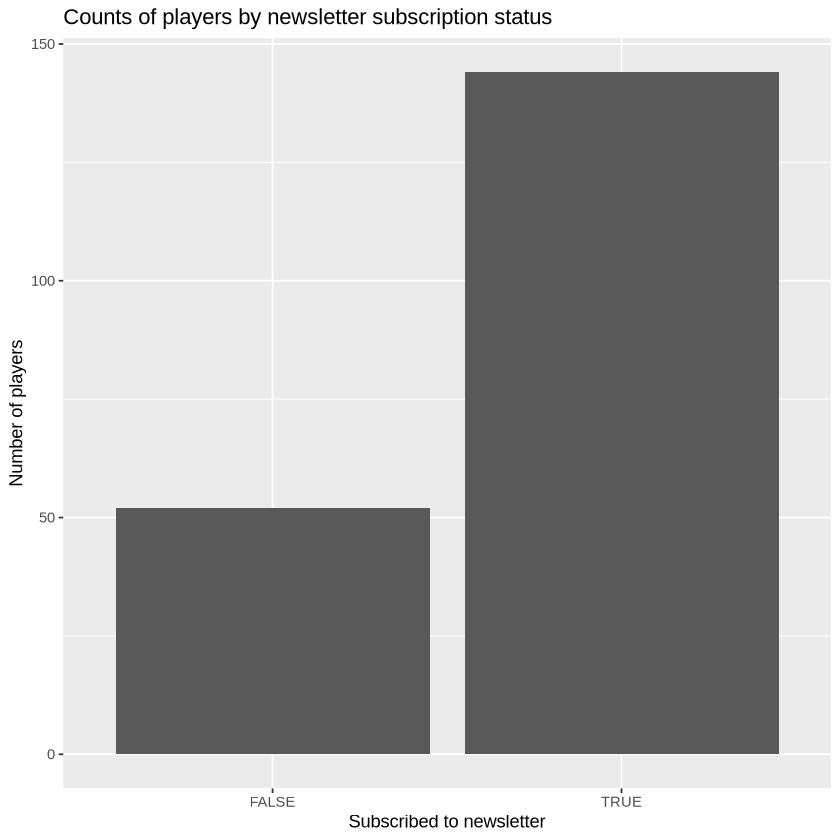

In [24]:
players_clean |>
    ggplot(aes(x = subscribe)) +
    geom_bar() +
    labs(
        title = "Counts of players by newsletter subscription status", 
        x = "Subscribed to newsletter",
        y = "Number of players"
        )

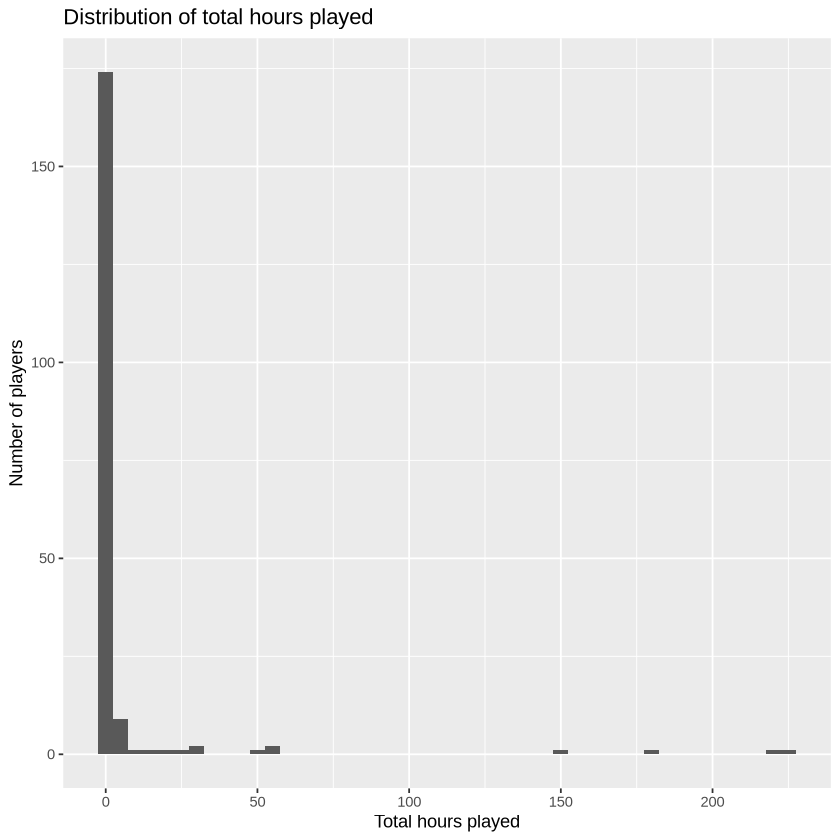

In [25]:
players_clean |>
    ggplot(aes(x = played_hours))+
    geom_histogram(binwidth = 5)+
    labs(
        title = "Distribution of total hours played" , 
        x = "Total hours played",
        y = "Number of players"
        )

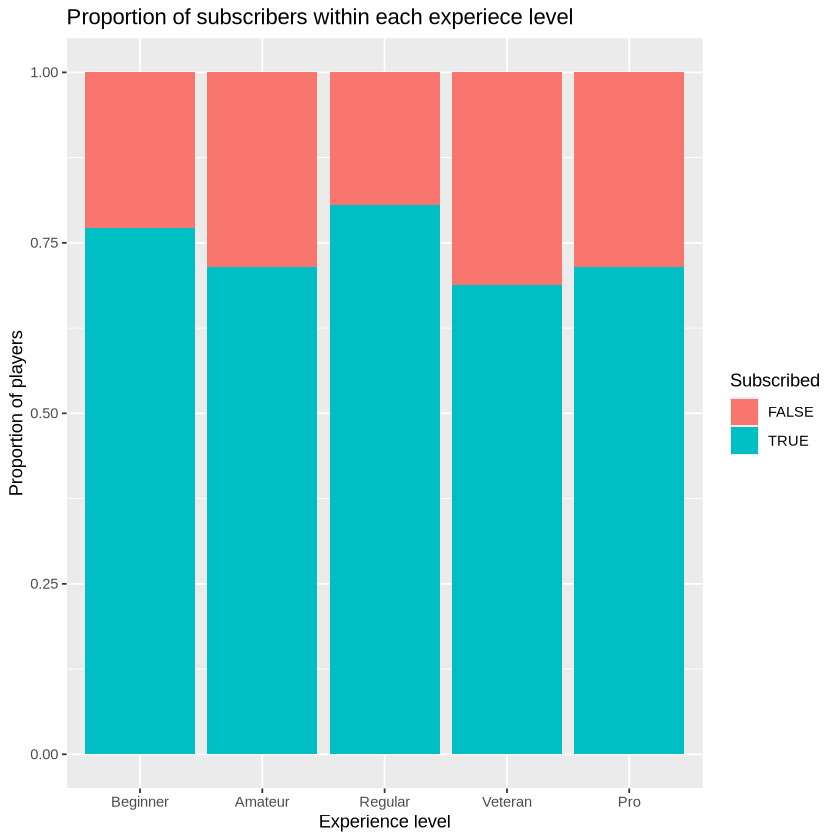

In [26]:
players_clean |>
    ggplot(aes(x = experience, fill = subscribe))+
    geom_bar(position = "fill") + 
    labs(
        title = "Proportion of subscribers within each experiece level",
        x = "Experience level",
        y = "Proportion of players",
        fill = "Subscribed"
        )


# 1. Data Description
The data come from a Minecraft research server and consist of two tables. The file 'players.csv' has 196 rows (one per player) and 7 variables: experience(self-rated category), subscribe (logical flag for newsletter signup), hashedEmail (anonymous ID), played_hours (total hours on the server), name, gender, and Age(years). Age has 2 missing values; all other variables are complete. 'sessions.csv' has 1,535 row (one per play session) and 5 variables, and each session links to a players via hashedEmail. 

in 'players.csv', the quantitative variables are Age and played_hours. Mean Age is about 21.14 years (min 9, max 58). Mean played_hours is about 5.85 hours, but the distribution is very skewed: many players have under an hour total, while a few have more than 200 hours. A small group of "heavy" players therefore contribute to most of the playtime. Potential issues include missing ages, self_report bias for Age and gender, and outliers in played_hours. Since participation was voluntary, the sample may also be biased toward more engaged Minecraft players.

# 2. Question
Broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter?

Specific question: Can we predict whether a player subscribes to the newsletter using their experience level, age, gender, and total hours played on the Minecraft research server?

This dataset is suitable because subscribe directly records records the outcome, and experience, Age, gender, and played_hours capture plausible drivers of newsletter interest. Only light wrangling is needed to treat subscribe and experience as categorical, standardize numeric predators, and decide how to handle missing ages before modelling.

# 3. Exploratory data analysis and visualization

I created simple bar plots, histogram, and boxplots for subscribe, Age, played_hours, and experience. Roughly three quarters of players subscribed to the newsletter. Subscribers tend to have much higher played_hours than non-subscribers, while the Age distributions overlap but non-subscribers look slightly older on average. Expereince levels all show relatively high subscription rates. These patterns suggest that playtime and experience should be informative predictors, and also confirm that there are some extreme playtime values to keep in mind for distance-based methods.

# 4. Methods and plan

I plan to use k-nearest neghbors (KNN) classification with subscribe as the response and standardized Age, standardized played_hours, and encoded experience and gender as predictors. KNN seems to be the right path as the outcome is binary and it makes few parametric assumptions. It assumes that the players with similar subscription behavior and that predictors are on comparable scales, so I'll centre and scale numeric variables. Limitations include sensitivity to the choice of k, possible class imbalance, and lower interpretabikity compared to parametric models. 

For the model selection, I plan on splitting the data into a training set which will include about 75%, and a test set with about 25% after basic cleaning. Within the training set I'll use the k-fold cross-validation to tune k and choose the model based on accuracy, then evaluate the final model on the held-out set.